In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
# Statistics
from evaluation.classification.statistics import get_precisions, get_size_list_from_xte
# Visualize
from evaluation.classification.visualize import plot_df_distrib_size

%matplotlib inline
plt.style.use("ggplot")

### --- compare precision with population ---

In [2]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_Rotate/validation_matrix.csv')
resnet50_manual = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_Rotate_manual/validation_matrix.csv')
resnet50_KD = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_Rotate_KD/validation_matrix.csv')

In [3]:
resnet50_precisions = get_precisions(resnet50)
resnet50_manual_precisions = get_precisions(resnet50_manual)
resnet50_KD_precisions = get_precisions(resnet50_KD)

In [4]:
exp_name = ["resnet50", "resnet50_manual", "resnet50_KD"]
exp_ap = [resnet50_precisions.mean(), resnet50_manual_precisions.mean(), resnet50_KD_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_ap": exp_ap})
df.index = exp_name
df

,exp_ap
resnet50,0.858906
resnet50_manual,0.854949
resnet50_KD,0.855302


In [6]:
insect_names = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label = pd.DataFrame({"resnet50": resnet50_precisions, "resnet50_manual": resnet50_manual_precisions, "resnet50_KD": resnet50_KD_precisions})
df_per_label.index = insect_names
df_per_label

,resnet50,resnet50_manual,resnet50_KD
Diptera,0.893069,0.899010,0.920792
Ephemeridae,0.916084,0.846154,0.846154
Ephemeroptera,0.733788,0.754266,0.726962
Lepidoptera,0.934926,0.954695,0.947282
Plecoptera,0.837728,0.837728,0.847870
Trichoptera,0.837838,0.837838,0.842752


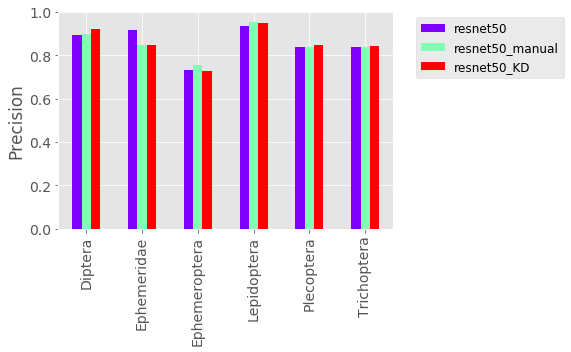

In [8]:
plt.rcParams["font.size"] = 14
df_per_label.plot(kind="bar", y=["resnet50", "resnet50_manual", "resnet50_KD"], cmap="rainbow")
plt.ylabel("Precision")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_labelsmoothing/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
cls_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806/each_size_df.csv')
cls_each_size_df["order"] = cls_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(cls_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})
insect_size_df = insect_size_df.drop(insect_size_df.index[[0, 1]])

In [10]:
resnet50 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_Rotate/all_size_df.csv')
resnet50_manual = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_Rotate_manual/all_size_df.csv')
resnet50_KD = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_20200806_Rotate_KD/all_size_df.csv')

In [11]:
resnet50 = resnet50.drop(resnet50.index[[0, 1]])
resnet50_manual = resnet50_manual.drop(resnet50_manual.index[[0, 1]])
resnet50_KD = resnet50_KD.drop(resnet50_KD.index[[0, 1]])

In [12]:
insect_size_df["Insect_size"] = resnet50["Insect_size"]
insect_size_df

,order,count,Insect_size
2,7.0,12,205.833333
3,8.0,51,395.039216
4,9.0,131,776.328244
5,10.0,403,1572.317618
6,11.0,1004,2982.721116
7,12.0,740,5730.868919
8,13.0,431,11417.570766
9,14.0,260,23926.192308
10,15.0,21,35455.380952


In [13]:
all_df = pd.DataFrame()
all_df["order"] = insect_size_df["order"]
all_df["count"] = insect_size_df["count"]
all_df["resnet50"] = resnet50["Accuracy"]
all_df["resnet50_manual"] = resnet50_manual["Accuracy"]
all_df["resnet50_KD"] = resnet50_KD["Accuracy"]
all_df

,order,count,resnet50,resnet50_manual,resnet50_KD
2,7.0,12,1.000000,1.000000,1.000000
3,8.0,51,0.862745,0.862745,0.882353
4,9.0,131,0.748092,0.786260,0.770992
5,10.0,403,0.751861,0.789082,0.779156
6,11.0,1004,0.853586,0.862550,0.861554
7,12.0,740,0.927027,0.922973,0.921622
8,13.0,431,0.955916,0.948956,0.967517
9,14.0,260,0.980769,0.976923,0.980769
10,15.0,21,0.904762,0.904762,0.904762


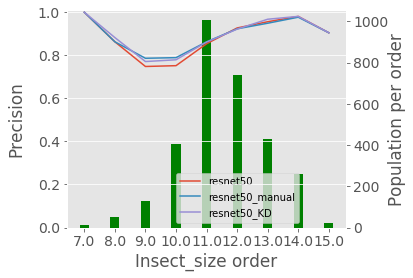

In [14]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["resnet50"], label="resnet50")
ax2.plot(x_label, all_df["resnet50_manual"], label="resnet50_manual")
ax2.plot(x_label, all_df["resnet50_KD"], label="resnet50_KD")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.85, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.set_ylim(0., 1.01)
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_labelsmoothing/compare_precision_distrib_of_size.png", bbox_inches="tight")